In [1]:
#checking the ta-lib installation is correct

import talib
print("TA-Lib version:", talib.__version__)


TA-Lib version: 0.5.1


In [2]:
import sys
import os

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

# Importing the module
import finance_utils as fu

# Loading stock price data
file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\TSLA_historical_data.csv'
stock_data = fu.load_stock_data(file_path)

# Prepare the data
prepared_data = fu.prepare_stock_data(stock_data) 


# Display the first few rows of the processed data
print(prepared_data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [3]:
# Import the module
import technical_analysis_indicator as ta

# Add a 20-day Simple Moving Average (SMA) to the prepared data
prepared_data = ta.add_sma(prepared_data, period=20)

# Add a 14-day Relative Strength Index (RSI) to the prepared data
prepared_data = ta.add_rsi(prepared_data, period=14)

# Add Bollinger Bands to the prepared data
prepared_data = ta.add_bollinger_bands(prepared_data, period=20)

# Add MACD to the prepared data
prepared_data = ta.add_macd(prepared_data)


# To handle NaN values
prepared_data = prepared_data.dropna()

# Display the first few rows
print(prepared_data.head(10))


         Date      Open      High       Low     Close  Adj Close    Volume  \
33 2010-08-16  1.230000  1.253333  1.217333  1.252000   1.252000   7287000   
34 2010-08-17  1.264000  1.293333  1.252000  1.276667   1.276667   6718500   
35 2010-08-18  1.306000  1.306000  1.240000  1.251333   1.251333   9019500   
36 2010-08-19  1.236000  1.283333  1.222000  1.252667   1.252667   8686500   
37 2010-08-20  1.243333  1.274000  1.234000  1.273333   1.273333   4440000   
38 2010-08-23  1.272667  1.359333  1.266667  1.342000   1.342000  16321500   
39 2010-08-24  1.283333  1.314000  1.263333  1.280000   1.280000  10096500   
40 2010-08-25  1.277333  1.332000  1.237333  1.326667   1.326667   7549500   
41 2010-08-26  1.326000  1.351333  1.306667  1.316667   1.316667   6507000   
42 2010-08-27  1.316667  1.324667  1.300000  1.313333   1.313333   5694000   

    Dividends  Stock Splits    SMA_20        RSI  BB_upper  BB_middle  \
33        0.0           0.0  1.335733  40.267058  1.490121   1.33573

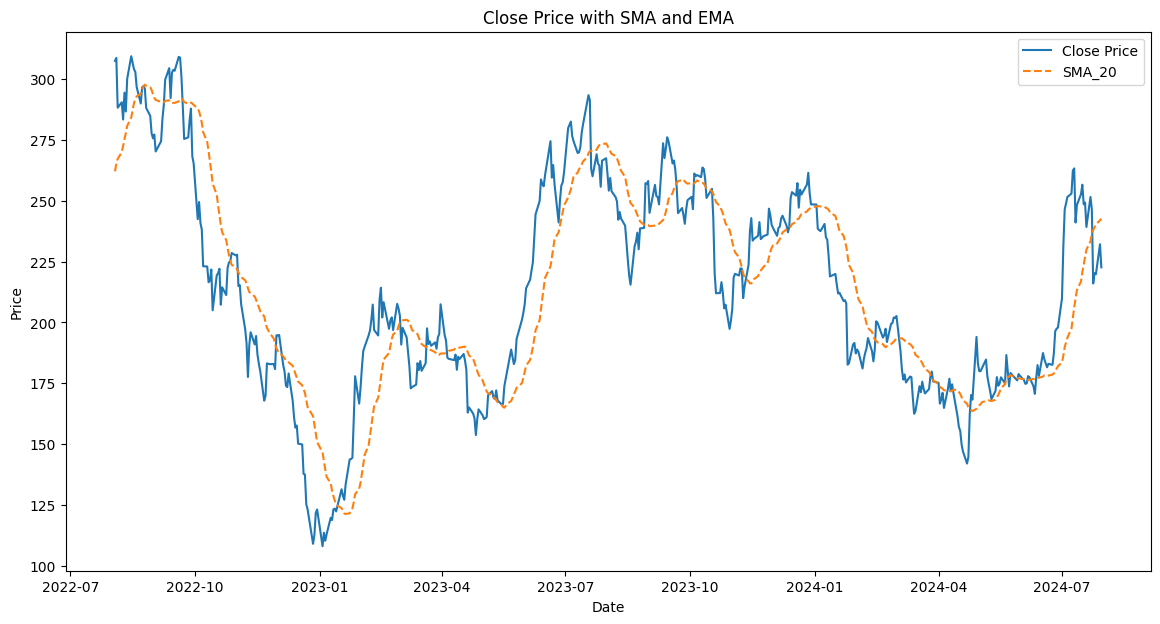

In [4]:
import visualization_utils as vu

# plot of the stock's close price with SMA and EMA with limited rows
vu.plot_close_with_moving_averages(prepared_data, num_rows=500)


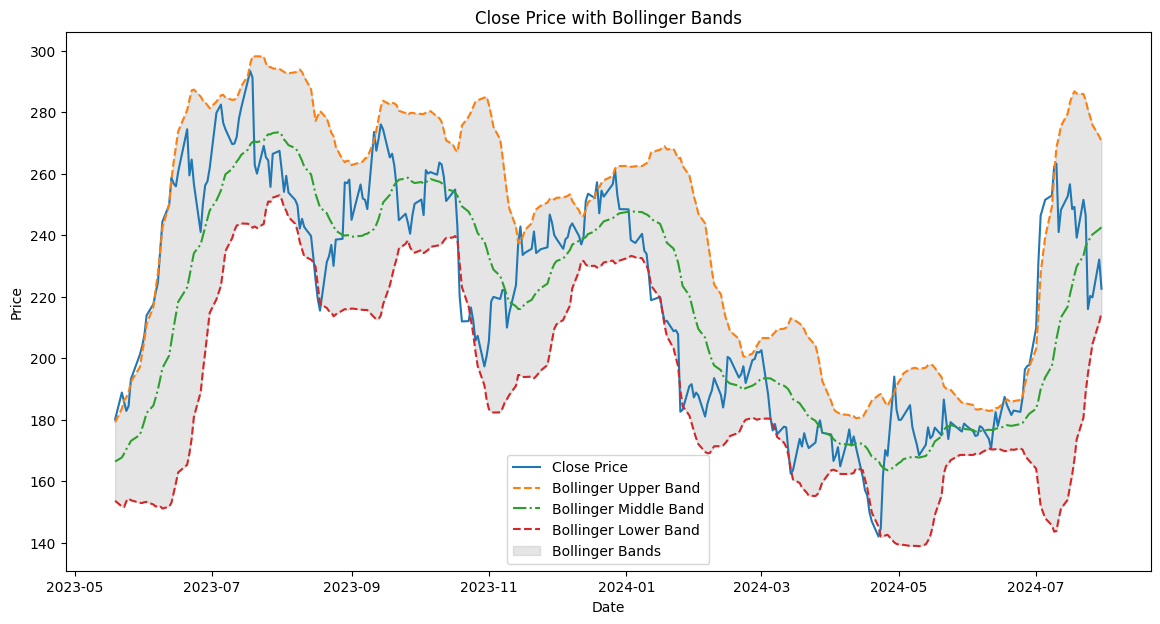

In [5]:
# plot of the stock's close price with Bollinger Bands with limited rows
vu.plot_bollinger_bands(prepared_data, num_rows=300)



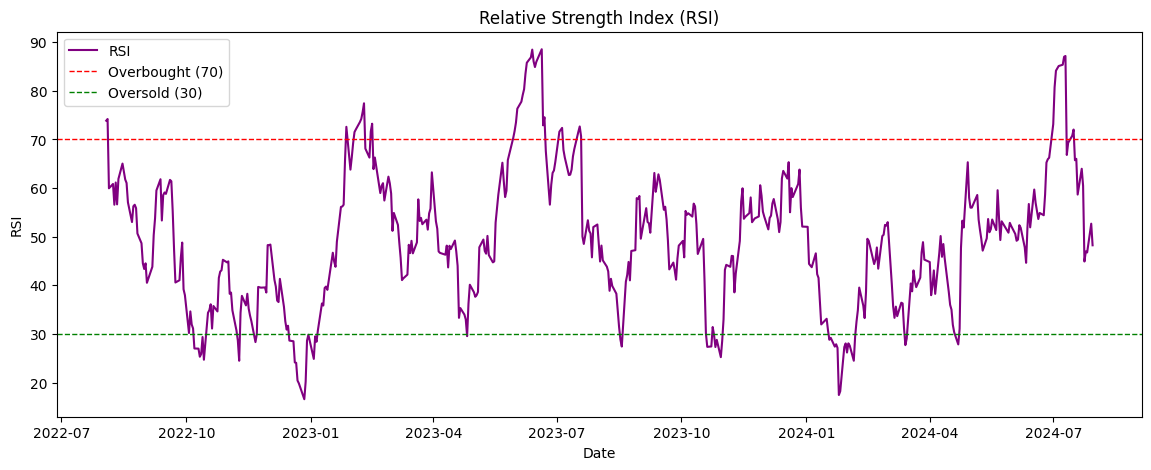

In [6]:
# plot of the RSI (Relative Strength Index) with limited rows
vu.plot_rsi(prepared_data, num_rows=500)

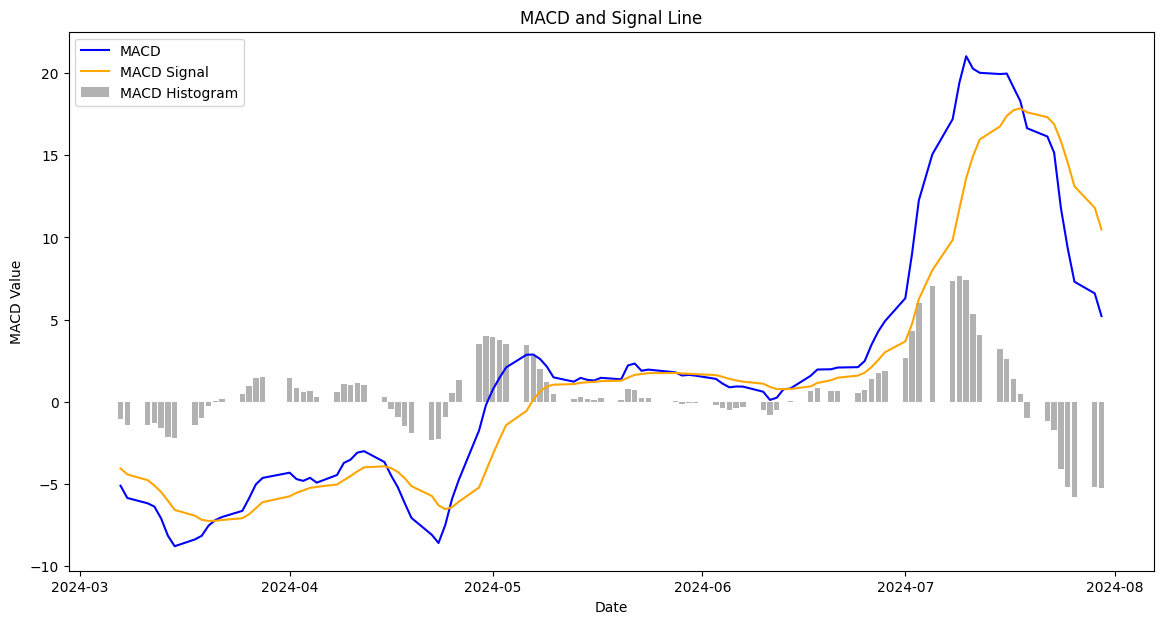

In [7]:
# plot the MACD (Moving Average Convergence Divergence) with limited rows
vu.plot_macd(prepared_data, num_rows=100)

C:\Users\HP\OneDrive\Desktop\ai2\kaim-week-01\scripts\visualization_utils.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_col] = pd.to_datetime(df[date_col])


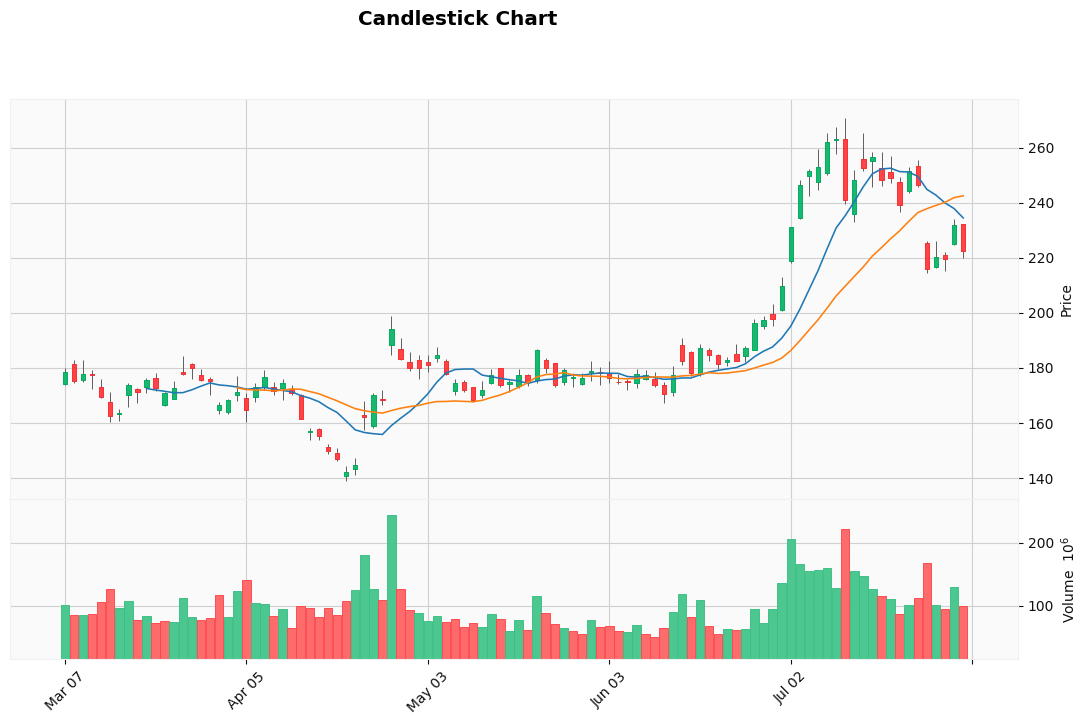

In [8]:
# plot of the candlestick chart with limited rows
vu.plot_candlestick_chart(prepared_data, num_rows=100)

In [9]:
# financial analysis using pynance 

# Add the 'scripts' folder to the system path
script_path = os.path.abspath('../scripts')  
sys.path.append(script_path)

import importlib
import pynance_analysis as pa
importlib.reload(pa)

# define stock symbol and data range
symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2023-12-31'

# fetch data using fetch_data function
data = pa.fetch_data(symbol, start_date, end_date)

# check the fetched data
print(data.head())
print(data.columns)



        Date    Open    High     Low   Close     Volume
0 2023-12-29  255.10  255.19  247.43  248.48  100891578
1 2023-12-28  263.66  265.13  252.71  253.18  113619943
2 2023-12-27  258.35  263.34  257.52  261.44  106494359
3 2023-12-26  254.49  257.97  252.91  256.61   86892382
4 2023-12-22  256.76  258.22  251.37  252.54   93370094
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [10]:
# function for calculating technical indicator
data = pa.calculate_indicators(data)
print(data.head())


         Date    Open    High     Low   Close     Volume    SMA_20  \
19 2023-12-01  233.14  240.19  231.90  238.83  121331709  247.1380   
20 2023-11-30  245.14  245.22  236.91  240.08  132353196  246.7180   
21 2023-11-29  249.21  252.75  242.76  244.14  135401335  246.2660   
22 2023-11-28  236.68  247.00  234.01  246.72  148549913  245.5300   
23 2023-11-27  236.89  238.33  232.10  236.08  112031763  244.5035   

        EMA_20        RSI  BB_middle    BB_upper    BB_lower      MACD  \
19  244.300994  36.681965   247.1380  262.910219  231.365781 -3.206309   
20  243.898995  43.304249   246.7180  262.784376  230.651624 -3.127281   
21  243.921948  35.995717   246.2660  262.073478  230.458522 -2.705852   
22  244.188429  43.928410   245.5300  259.642589  231.417411 -2.139024   
23  243.416198  33.676912   244.5035  258.203263  230.803737 -2.519327   

    MACD_signal  MACD_hist  
19    -1.978130  -1.228179  
20    -2.207960  -0.919321  
21    -2.307538  -0.398314  
22    -2.273835   

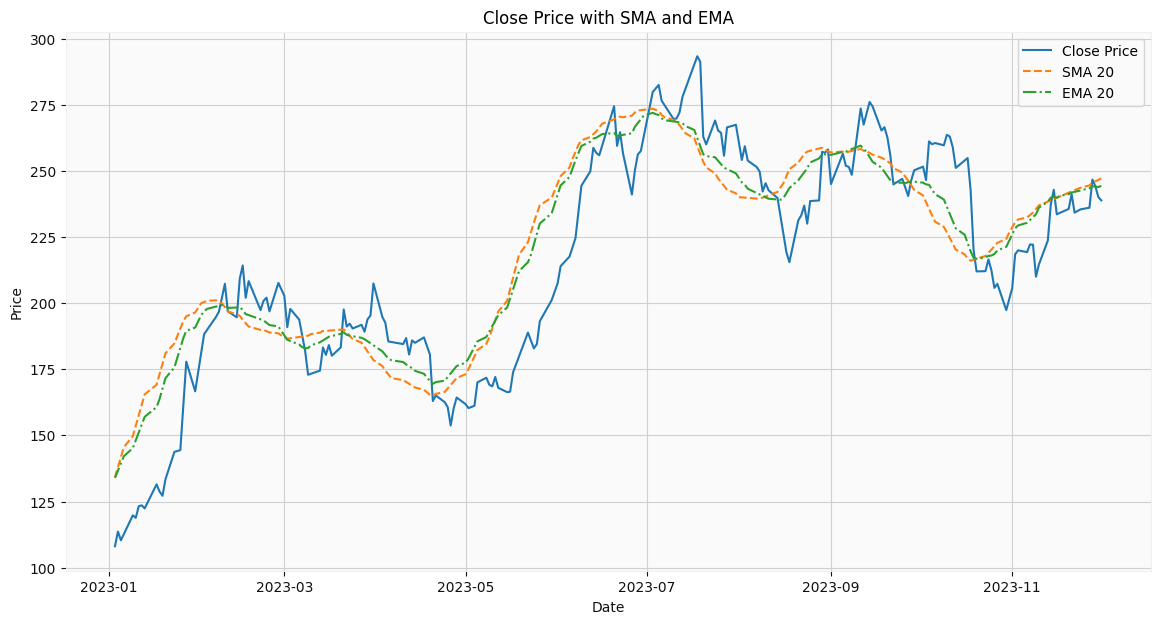

In [11]:
# visulazation of close price with sma amd ema 
pa.plot_close_with_indicators(data)

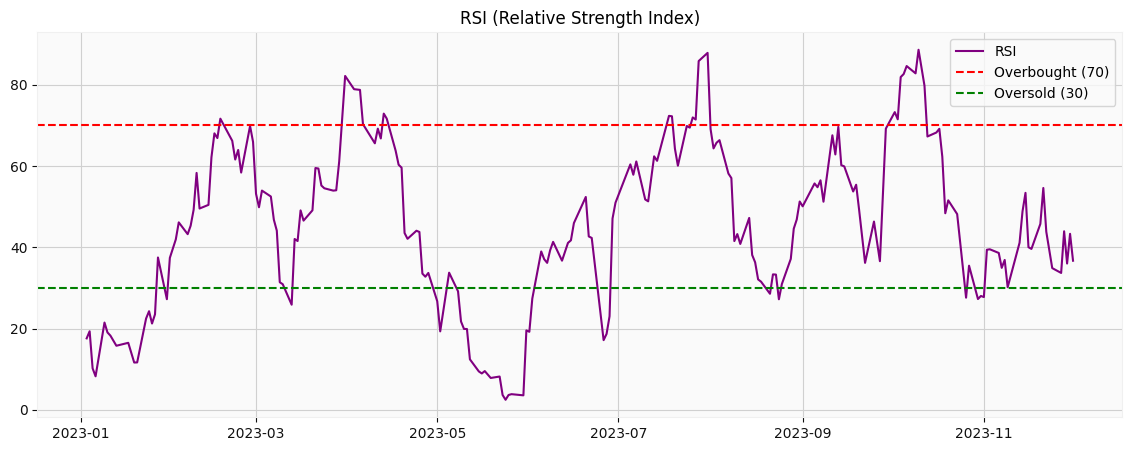

In [12]:

pa.plot_rsi(data)

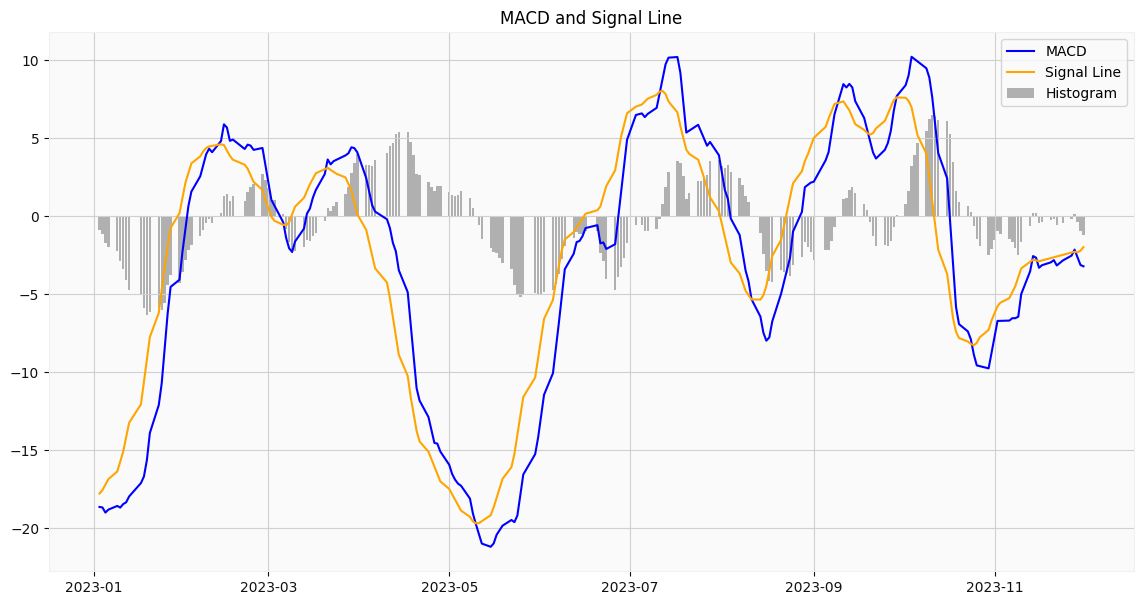

In [14]:
pa.plot_macd(data)

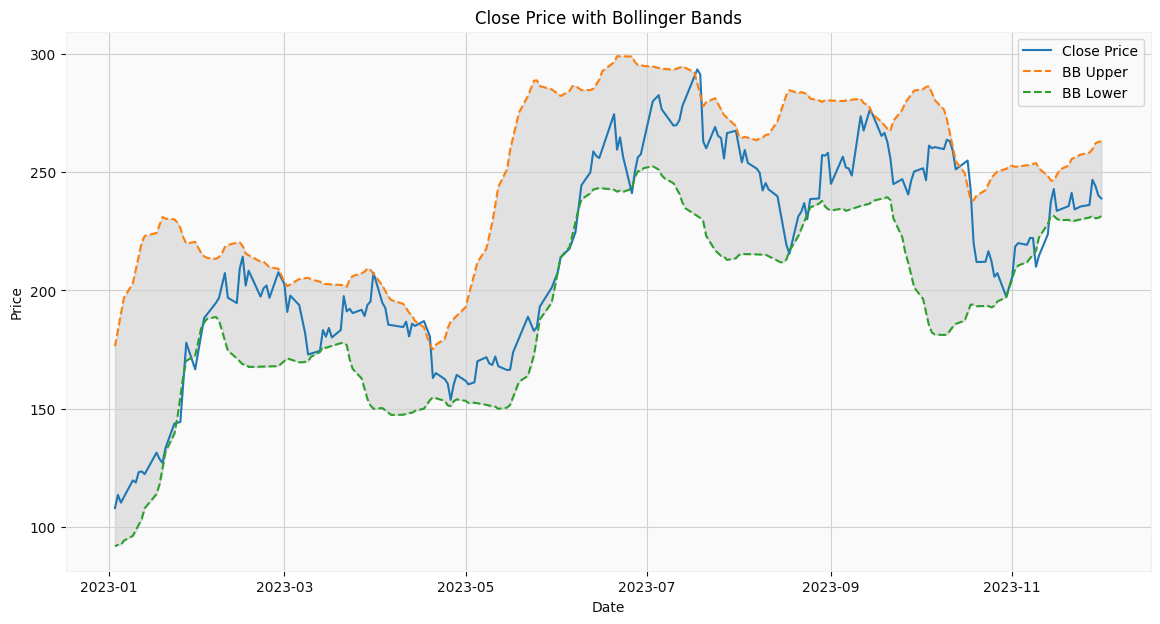

In [15]:
pa.plot_bollinger_bands(data)

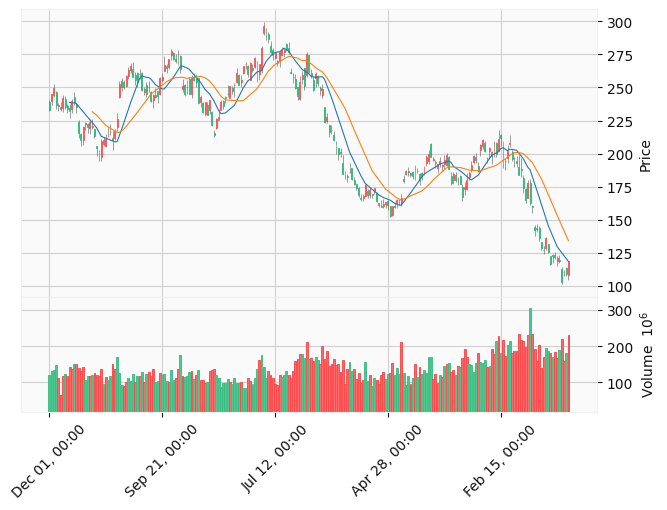

In [16]:
pa.plot_candlestick_chart(data)